In [46]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
import platform
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D

In [2]:
from shapes import *
from detect_bubbles import *
from utils import *

In [3]:
%load_ext autoreload
%autoreload 2

In [7]:
platform.system()

'Windows'

In [167]:
plat = platform.system()
if plat == "Darwin":
    calib_dir =  "/Users/Habib/Google Drive/Uni Heidelberg/11 WS 2017-2018/Masterarbeit/Messungen/Reihe_35_calib_DoF" 
elif plat == "Windows":
    calib_dir = "../Messungen/Reihe_35_calib_DoF/"

In [168]:
cim = []
bgim = []
filenames = []
for file in os.listdir(calib_dir):
    filenames.append(file)

filenames.sort() # sort after creation date since date is in the name

In [169]:
for file in filenames:
    if file.endswith("2.bmp"):
        img = cv2.imread(os.path.join(calib_dir, file), 0)
        cim.append(img)
    elif file.endswith("1.bmp"):
        img = cv2.imread(os.path.join(calib_dir, file), 0)
        bgim.append(img)

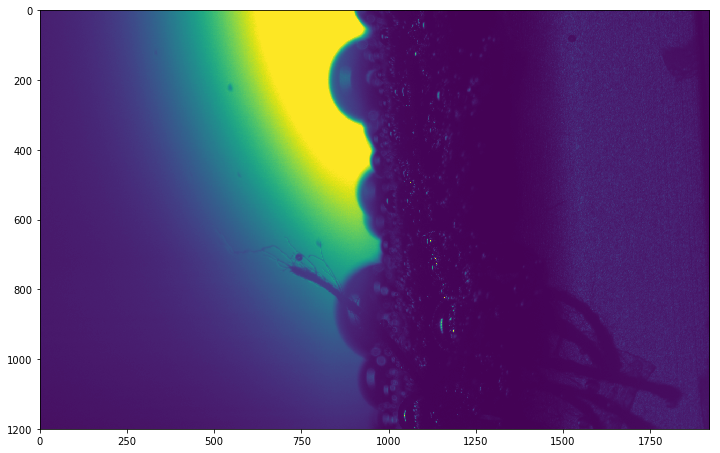

In [11]:
plt.figure(figsize=(12,12))
plt.imshow(bgim[-4])

In [20]:
""""
for idx, im in enumerate(bgim[1:]):
    cv2.imwrite(os.path.join(str(idx)+".bmp", "greenredlit"), im)
    
for idx, im in enumerate(cim[1:]):
    cv2.imwrite(str(idx)+".bmp", im)
""""

In [9]:
# load stable data
stable_img_dir = "data/stable_redlit/"
filenames = [fn for fn in os.listdir(stable_img_dir) if fn.endswith(".png")]
filenames

['stbl0001.png',
 'stbl0002.png',
 'stbl0003.png',
 'stbl0004.png',
 'stbl0005.png',
 'stbl0006.png',
 'stbl0007.png',
 'stbl0008.png',
 'stbl0009.png',
 'stbl0010.png',
 'stbl0011.png',
 'stbl0012.png',
 'stbl0013.png',
 'stbl0014.png',
 'stbl0015.png',
 'stbl0016.png',
 'stbl0017.png',
 'stbl0018.png',
 'stbl0019.png',
 'stbl0020.png',
 'stbl0021.png',
 'stbl0022.png',
 'stbl0023.png',
 'stbl0024.png',
 'stbl0025.png',
 'stbl0026.png',
 'stbl0027.png',
 'stbl0028.png',
 'stbl0029.png',
 'stbl0030.png',
 'stbl0031.png',
 'stbl0032.png',
 'stbl0033.png',
 'stbl0034.png',
 'stbl0035.png',
 'stbl0036.png',
 'stbl0037.png',
 'stbl0038.png',
 'stbl0039.png',
 'stbl0040.png',
 'stbl0041.png',
 'stbl0042.png',
 'stbl0043.png',
 'stbl0044.png',
 'stbl0045.png',
 'stbl0046.png',
 'stbl0047.png',
 'stbl0048.png']

In [10]:
stbl = [cv2.imread(os.path.join(stable_img_dir, fn),0) 
        for fn in filenames]

In [46]:
LINE_LEN = 50

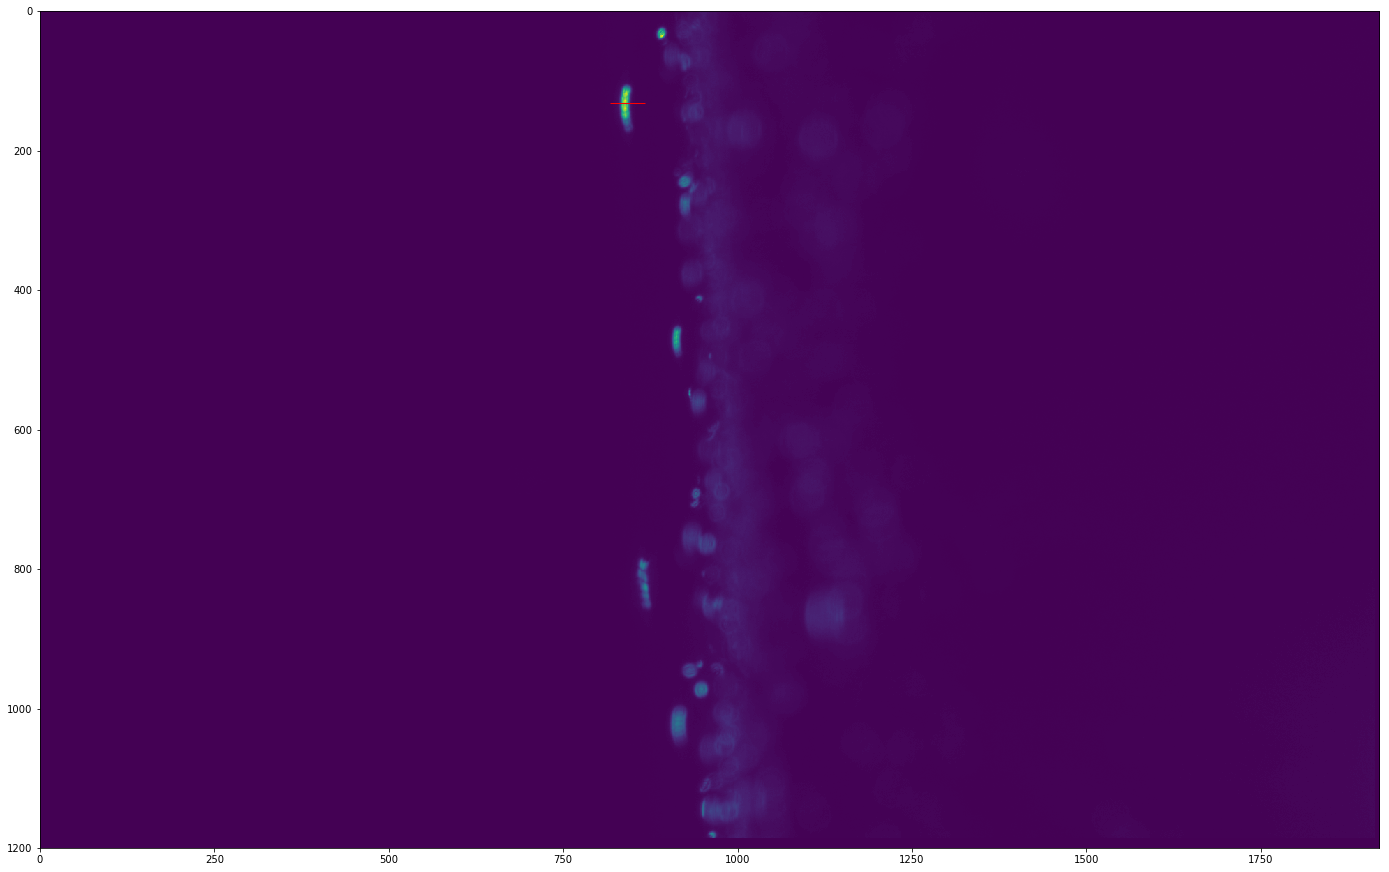

In [47]:
p1 = Point(842, 132)

fig = plt.figure(figsize=(24,24))
ax = fig.add_subplot(111, aspect="equal")
plt.imshow(stbl[14])
ax.add_patch(patches.Rectangle( (p1.x-LINE_LEN/2, p1.y),
                                LINE_LEN,
                                0,
                                fill=False,
                                color="red"))




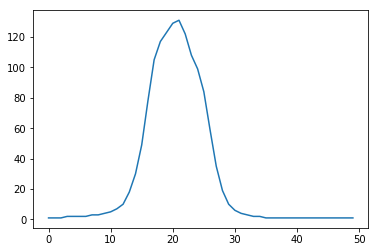

In [69]:
plt.plot(stbl[14][p1.y, int(p1.x-LINE_LEN/2):int(p1.x+LINE_LEN/2)])

In [70]:
fit_line = stbl[14][p1.y, int(p1.x-LINE_LEN/2):int(p1.x+LINE_LEN/2)]

In [86]:
(amp, mu, sigma), _ = curve_fit(gauss,
                               np.arange(0, len(fit_line)),
                               fit_line)

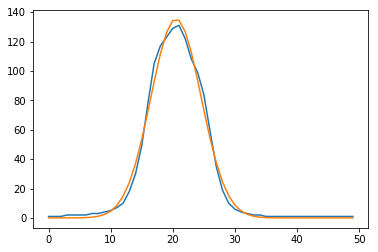

In [88]:
plt.plot(fit_line)
xdata = np.arange(0, len(fit_line))
plt.plot(gauss(xdata, amp, mu, sigma))

## same as above but automatically

In [11]:
len(stbl)

48

In [41]:
HORIZONTAL = Point(1, 0)
LINE_LEN = 20
calib_bubbles = [ 
    CalibBubble(Line(direction=HORIZONTAL, point=Point(842, 132)), radius=80, frame_start=1, frame_end=48),
    CalibBubble(Line(HORIZONTAL, Point(912, 470)), 54, 8, 36),
    CalibBubble(Line(HORIZONTAL, Point(968, 665)), 19, 24, 38),
    CalibBubble(Line(HORIZONTAL, Point(1023, 636)), 15, 36, 44),
    CalibBubble(Line(HORIZONTAL, Point(1103, 723)), 6, 43, 47),
    CalibBubble(Line(HORIZONTAL, Point(1127, 744)), 22, 42, 48)
    
]

In [42]:
curves = []
for cb in calib_bubbles:
    cb_curve = []
    for f in np.arange(cb.frame_start, cb.frame_end):
        fit_line = stbl[f][cb.line.point.y, int(cb.line.point.x-LINE_LEN/2):int(cb.line.point.x+LINE_LEN/2)]
        (amp, mu, sigma), _ = curve_fit(gauss, 
                                       np.arange(0, len(fit_line)),
                                       fit_line)
        cb_curve.append(np.abs(sigma))
    curves.append(cb_curve)
        

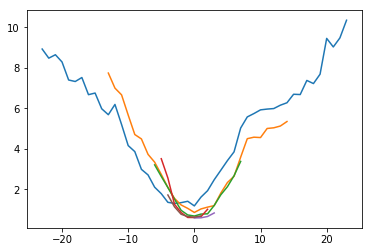

In [67]:
for cu in curves:
    xx = np.arange(0, len(cu))
    plt.plot(xx-np.argmin(cu), cu)

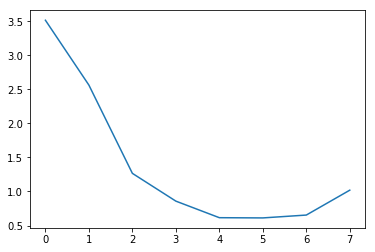

In [44]:
plt.plot(curves[-3])

In [65]:
np.argmin(curves[0])

23

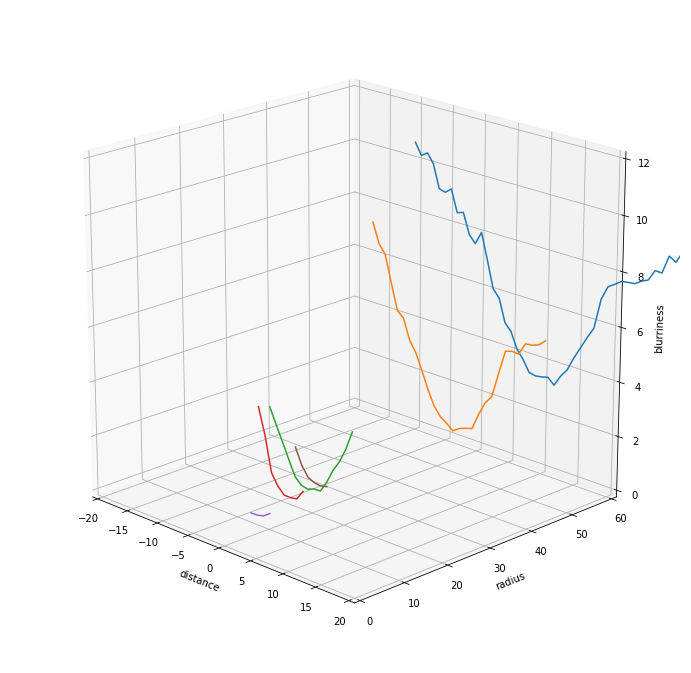

In [343]:
fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')

for cu, cb in zip(curves, calib_bubbles):
    x = np.arange(0, len(cu)) -np.argmin(cu)
    y = cu
    ax.plot(x,y, zs=cb.radius, zdir='y', label='curve in (x,z)')
    
ax.set_xlim(-20, 20)
ax.set_ylim(0, 60)
ax.set_zlim(0, 12)
ax.set_xlabel('distance')
ax.set_ylabel('radius')
ax.set_zlabel('blurriness')
ax.view_init(elev=20., azim=-45)

In [189]:
cu_img = np.zeros((90, 50))

In [190]:
for cu, cb in zip(curves, calib_bubbles):
    xdata = np.arange(0, len(cu)) - np.argmin(cu) + 25
    for x, y in zip(xdata, cu):
        cu_img[int(cb.radius), x] = y
    

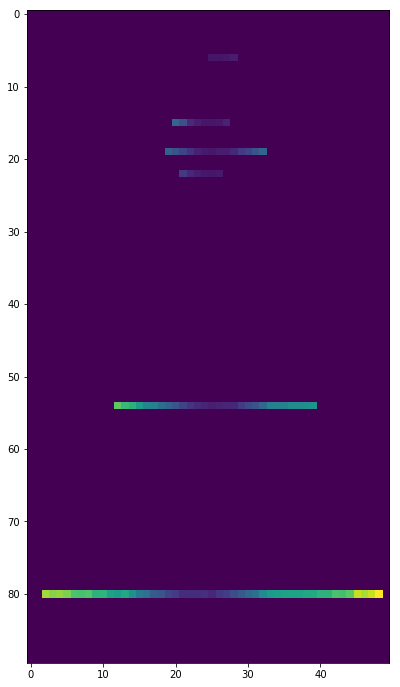

In [191]:
plt.figure(figsize=(12,12))
plt.imshow(cu_img)

In [192]:
cu_img_fit = np.empty(cu_img.shape)

In [304]:
cu_img_fit.shape

(90, 50)

In [193]:
for idx in range(cu_img.shape[0]):
    for idy in range(cu_img.shape[1]):
        if cu_img[idx, idy] == 0:
            cu_img_fit[idx, idy] = np.nan

C:\Users\windis\Anaconda3\lib\site-packages\matplotlib\colors.py:860: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin


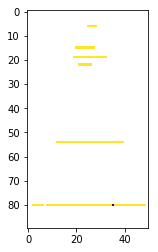

In [195]:
plt.imshow(cu_img_fit)

In [283]:
def poly_calib(xdata_tuple, b1, b0, a4, a3, a2, a1, a0):
    (x, y) = xdata_tuple
    z = (b1*y+b0) + a4*x**4+(a3*x**3 + a2*x**2 + a1*x + a0)
    return z.ravel()

In [339]:
def poly_calib(xdata_tuple, b1, b0, a2, a1, a0):
    (x, y) = xdata_tuple
    z = (b1*y+b0) * a2*x**2 + a1*x + a0
    return z.ravel()

In [340]:
x = np.linspace(-100, 100, 101)
y = np.linspace(-100, 100, 101)
x, y = np.meshgrid(x, y)
data = poly_calib((x, y), 1, 1, 1, 1, 1)

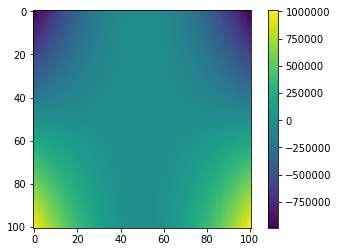

In [341]:
plt.imshow(data.reshape((101,101)))
plt.colorbar()

In [330]:
fit_data = cu_img_fit.ravel()
keep = ~np.isnan(fit_data)
fit_data_valid = fit_data[keep]


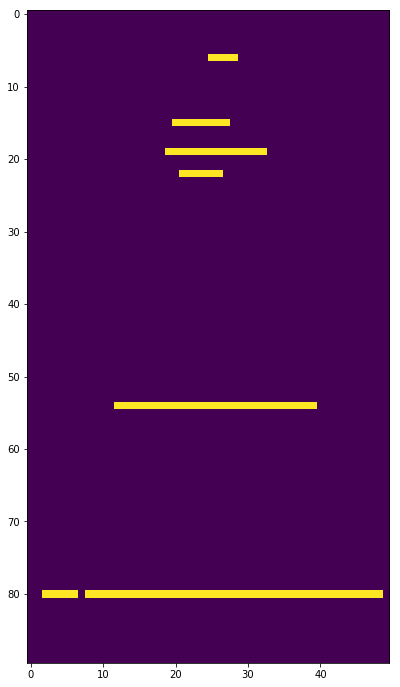

In [342]:
plt.figure(figsize=(12,12))
plt.imshow(keep.reshape(90,50))

In [331]:
x = np.arange(0, cu_img_fit.shape[1])
y = np.arange(0, cu_img_fit.shape[0])
x, y = np.meshgrid(x, y)
x_valid = x[keep.reshape(90,50)]
y_valid = y[keep.reshape(90,50)]

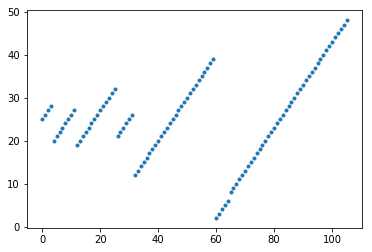

In [426]:
plt.plot(x_valid, '.')

In [332]:
popt, pcov = curve_fit(poly_calib, (x_valid, y_valid), fit_data_valid)

C:\Users\windis\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:738: RuntimeWarning: overflow encountered in square
  cost = np.sum(infodict['fvec'] ** 2)


In [333]:
fit_result = poly_calib((x, y), *popt)

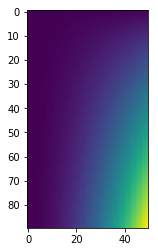

In [334]:
plt.imshow(fit_result.reshape(90,50))

In [344]:
def f1(x, m, b):
    return -x * m + b
def f2(x, a0, sigma, b):
    return a0 * np.exp(-x**2/sigma**2) + b

In [350]:
def calib_func(x, m, b, a0, sigma):
    return np.abs(x) * m + a0 * np.exp(-x**2/sigma**2) + b

In [351]:
fit_res = []
pcov_res = []
for cu in curves:
    popt, pcov = curve_fit(calib_func, 
                          np.arange(0, len(cu)),
                          cu)
    fit_res.append(popt)
    pcov_res.append(pcov)

C:\Users\windis\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


C:\Users\windis\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


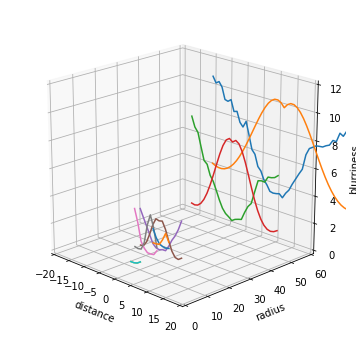

In [357]:
fig = plt.figure(figsize=(6,6))
ax = fig.gca(projection='3d')

for cu, cb in zip(curves, calib_bubbles):
    x = np.arange(0, len(cu)) -np.argmin(cu)
    y = cu
    popt, pcov = curve_fit(calib_func, 
                          np.arange(0, len(cu)),
                          cu)    
    ax.plot(x,y, zs=cb.radius, zdir='y', label='curve in (x,z)')
    ax.plot(x, calib_func(x, *popt), zs=cb.radius, zdir='y', label='curve in (x,z)')
    
ax.set_xlim(-20, 20)
ax.set_ylim(0, 60)
ax.set_zlim(0, 12)
ax.set_xlabel('distance')
ax.set_ylabel('radius')
ax.set_zlabel('blurriness')
ax.view_init(elev=20., azim=-45)

In [376]:
cu = curves[0]
popt, pcov = curve_fit(calib_func, 
                      np.arange(0, len(cu)),
                      cu)

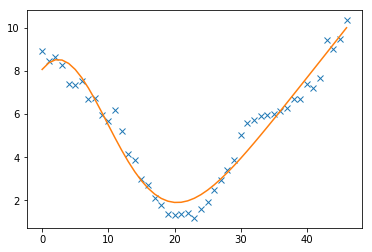

In [377]:
plt.plot(cu, 'x')
plt.plot(calib_func(np.arange(0, len(cu)), *popt))

In [379]:
cu = curves[1]
popt, pcov = curve_fit(calib_func, 
                      np.arange(0, len(cu)),
                      cu)

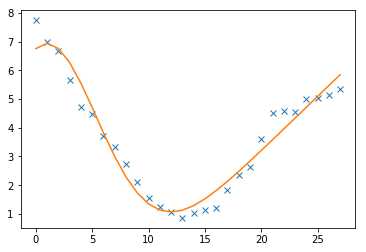

In [380]:
plt.plot(cu, 'x')
plt.plot(calib_func(np.arange(0, len(cu)), *popt))

In [381]:
cu = curves[2]
popt, pcov = curve_fit(calib_func, 
                      np.arange(0, len(cu)),
                      cu)

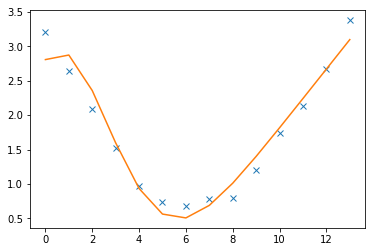

In [382]:
plt.plot(cu, 'x')
plt.plot(calib_func(np.arange(0, len(cu)), *popt))

In [383]:
cu = curves[3]
popt, pcov = curve_fit(calib_func, 
                      np.arange(0, len(cu)),
                      cu)

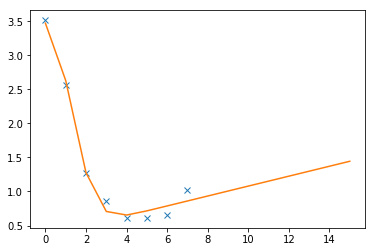

In [384]:
plt.plot(cu, 'x')
plt.plot(calib_func(np.arange(0, len(cu)*2), *popt))

In [385]:
cu = curves[4]
popt, pcov = curve_fit(calib_func, 
                      np.arange(0, len(cu)),
                      cu)

C:\Users\windis\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


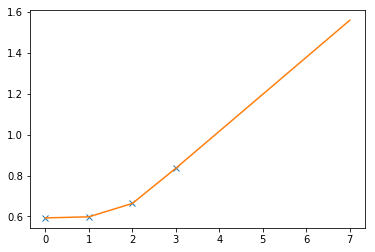

In [391]:
xx = np.arange(len(cu)*2)
plt.plot(cu, 'x')
plt.plot(calib_func(xx, *popt))

In [406]:
cu = curves[5]
popt, pcov = curve_fit(poly4, 
                      np.arange(0, len(cu)),
                      cu)

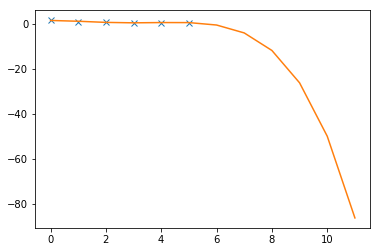

In [408]:
plt.plot(cu, 'x')
plt.plot(poly4(np.arange(0, len(cu)*2), *popt))

In [397]:
def poly4(x, a4, a3, a2, a1, a0):
    return a4*x**4 + a3*x**3 + a2*x**2 + a1*x**2 + a0

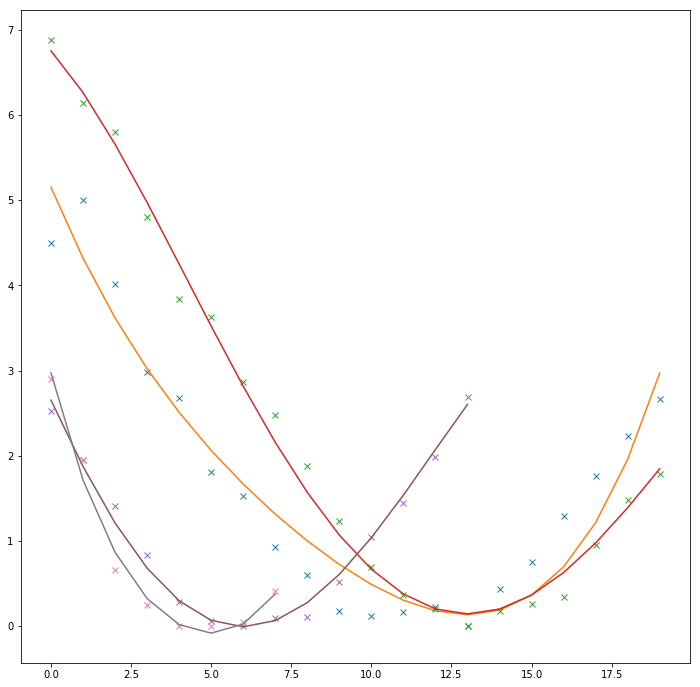

In [660]:
plt.figure(figsize=(12,12))
for cu in curves[:-2]:
    xx = np.arange(0, len(cu)) - np.argmin(cu)
    popt, pcov = curve_fit(poly4, xx, cu - min(cu))
    plt.plot(cu -min(cu), 'x')
    plt.plot(poly4(xx, *popt))

In [445]:
curves[0] = curves[0][10:30]

In [448]:
curves[1] = curves[1][0:20]

In [511]:
def parab(x, a2, a1, a0):
    x = np.asarray(x)
    return a2*x**2 + a1*x + a0

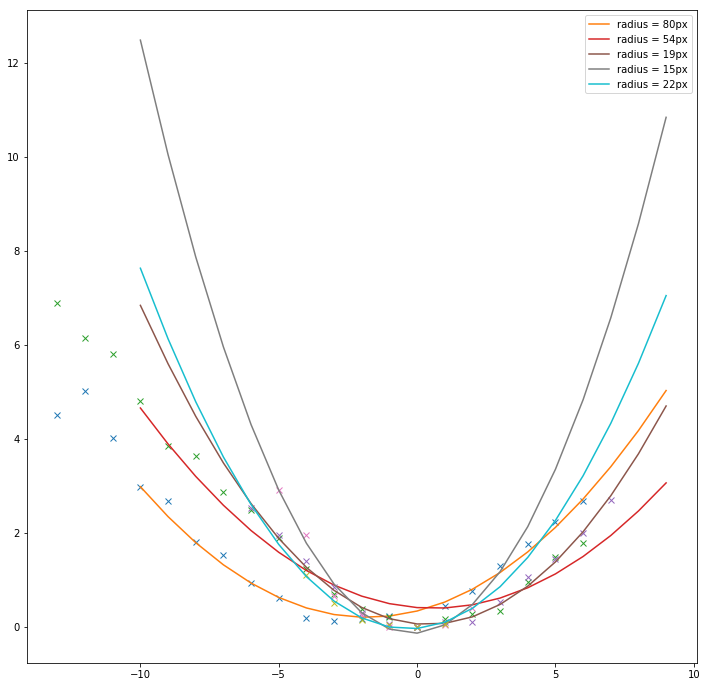

In [729]:
plt.figure(figsize=(12,12))
xfitdata = []
yfitdata = []
zfitdata = []
for cu, cb in zip(curves, calib_bubbles):
    if cb.radius != 6:
        xx = np.arange(0, len(cu)) - np.argmin(cu)
        xxfit = list(np.arange(-10, 10))
        popt, pcov = curve_fit(parab, xx, cu -min(cu))
        plt.plot(xx, cu-min(cu), 'x') 
        yyfit = list(parab(xxfit, *popt))
        plt.plot(xxfit, yyfit, label="radius = "+str(cb.radius) +"px")
        
        xfitdata += xxfit
        yfitdata += yyfit
        zfitdata += ([cb.radius]*len(xxfit))
        
plt.legend()

In [730]:
def scaled_parab(input_tuple, b1, a2, a1, c):
    (x, z) = input_tuple
    x = np.asarray(x)
    z = np.asarray(z)
    y = (b1*z) + a2*x**2 + a1*x +c
    return y.ravel()

In [731]:
def paraboloid(input_tuple, a, b, c, d, e):
    (x,z) = input_tuple
    x = np.asarray(x)
    z = np.asarray(z)
    y = a*(x-b)**2 + c*(z-d) + e
    return y.ravel()

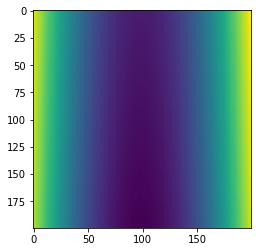

In [733]:
popt, pcov = curve_fit(scaled_parab, (xfitdata, zfitdata), yfitdata)

x = np.linspace(-20, 20, 200)
z = np.linspace(0, 90, 200)
x, z = np.meshgrid(x,z)
y = scaled_parab((x,z), *popt)# popt[0], popt[1], popt[2], popt[3])

plt.imshow(y.reshape(200,200))

In [738]:
popt

array([-0.02688192,  0.07090587,  0.02970268,  1.14543908])

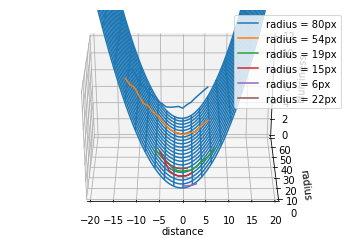

In [737]:
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot a basic wireframe.
ax.plot_wireframe(x, z, y.reshape(200,200), rstride=10, cstride=10)


for cu, cb in zip(curves, calib_bubbles):
    xraw = np.arange(0, len(cu)) -np.argmin(cu)
    yraw = cu
    ax.plot(xraw,yraw, zs=cb.radius, zdir='y', label='radius = '+str(cb.radius) +"px")
    


#ax.plot(xfitdata,yfitdata, zs=zfitdata, zdir='y', label='radius = '+str(cb.radius) +"px")
    
ax.set_xlim(-20, 20)
ax.set_ylim(0, 60)
ax.set_zlim(0, 12)
ax.set_xlabel('distance')
ax.set_ylabel('radius')
ax.set_zlabel('blurriness')
ax.view_init(elev=30., azim=-90)
plt.legend()